#Opgave 7.1
Antallet af ulykker, der sker på en travl motorvejsstrækning, er en stokastisk variabel (random variable)

**a) Hvad er de mulige værdier på denne stokastiske variabel?** <br>
0, 1, 2, 3 osv derudaf <br><br>

**b) Er værdierne tællelige? Forklar dit svar** <br>
Ja, da vi kan identificere de enkelte værdier (0, 1, 2)<br><br>

**c) Er der et begrænset antal værdier? Forklar dit svar.**<br>
Ja, da der er et begrænset antal af biler<br><br>

**d) Er den stokastiske variabel diskret eller kontinuert (discrete random variable/continuous random variable)?** <br>
Den er diskret, da vi kan tælle den, og det er et begrænset antal af disse værdier.

#Opgave 7.7
I en nylig opgørelse blev antallet fjernsyn opgjort per husstand (se side 172):

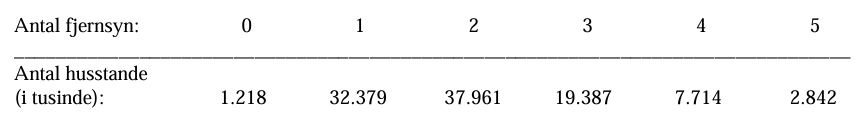

##Først opretter vi vores data i Python.

In [ ]:
import pandas as pd

# Vi opretter et datasæt, ved først at definere et såkaldt 'dictionary'.
# Dictionaries har key-value pairs, hvor hver key er navnet på en kolonne, og value som navnet antyder er værdierne under denne kolonne
data = {
    'Antal fjernsyn': [0, 1, 2, 3, 4, 5],
    'Antal husstande (i tusinde)': [1218, 32379, 37961, 19387, 7714, 2842]
}

# Nu kan vi blot bruge DataFrame funktionen fra pandas til at gøre vores dictionary til en dataframe
df = pd.DataFrame(data)

# Og så kan vi checke det virker ved at outputte vores dataframe
df


,Antal fjernsyn,Antal husstande (i tusinde)
0,0,1218
1,1,32379
2,2,37961
3,3,19387
4,4,7714
5,5,2842


##a. Lav en sandsynlighedsfordeling af X, antallet af fjernsyn per husstand

In [ ]:
# Beregn det samlede antal husstande
total_husstande = df['Antal husstande (i tusinde)'].sum()

# Beregn sandsynligheden for hvert antal fjernsyn, og opret en ny kolonne der består af disse værdier
df['Sandsynlighed'] = df['Antal husstande (i tusinde)'] / total_husstande

# Vis den opdaterede DataFrame med sandsynlighedsfordelingen
df

,Antal fjernsyn,Antal husstande (i tusinde),Sandsynlighed
0,0,1218,0.012000
1,1,32379,0.319002
2,2,37961,0.373996
3,3,19387,0.191003
4,4,7714,0.075999
5,5,2842,0.028000


Vi kan visualisere disse sandsynligheder på forskellig vis <br>
(Der kommer ikke flere eksempler på visualisering i dette løsningssæt, men jeg foreslår at i prøver at lege med det på egen hånd i de forskellige opgaver)

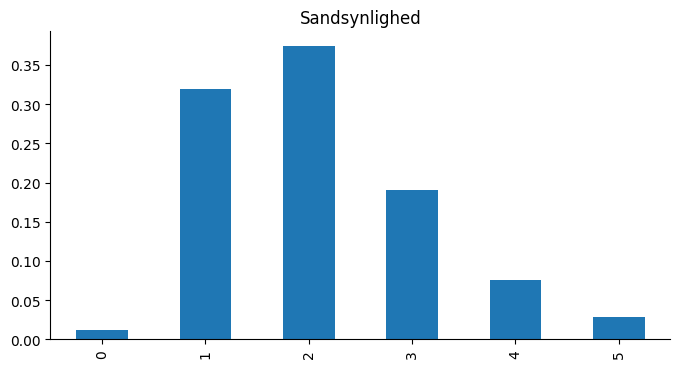

In [ ]:
from matplotlib import pyplot as plt
df['Sandsynlighed'].plot(kind='bar', figsize=(8, 4), title='Sandsynlighed')
plt.gca().spines[['top', 'right']].set_visible(False)

Vi kan teste vores matematik ved at kontrollere om det samlede sandsynlighedsrum er lig 1 (tilsvarende 100% sandsynlighed for et-eller-andet udfald, baseret på vores observationer)

In [ ]:
df.Sandsynlighed.sum()

1.0

##b) Bestem de følgende sandsynligheder

1. P(X mindre end eller lig 2) <br>
2. P(X større end 2)<br>
3. P(X er større end eller lig 4)

In [ ]:
# Vi skal igen bruge den totale sum af husstande
total_husstande = df['Antal husstande (i tusinde)'].sum()

# Beregn sandsynligheder
# Til at gøre dette kan vi gøre brug af filtering i vores DataFrame.
# I dette tilfælde vil vi kun have de rækker hvor X er mindre end eller lig med 2
# Dernæst vil vi have den sum af hustande der passer under disse kriterier
# for til sidst at dividere den sumværdi med den samlede totalsum for alle observationer.
solve_1 = df[df['Antal fjernsyn'] <= 2]['Antal husstande (i tusinde)'].sum() / total_husstande

# Vi kan bruge logikken om det samlede udfaldsrum, til at udregne de resterende sandsynligheder over 2 fjernsyn.
# Da P(X mindre end eller lig 2) + P(X større end 2) må udgøre hele vores udfaldsrum, 1 eller 100 %
# betyder det at vi kan tage vores udfaldsrum (1) og blot trække sandsynligheden for P(X mindre end eller lig 2) fra udfaldsrummet.
solve_2 = 1 - solve_1

# Vi følger samme fremgangsmåde som første løsning:
solve_3 = df[df['Antal fjernsyn'] >= 4]['Antal husstande (i tusinde)'].sum() / total_husstande

# Læg mærke til at jeg bruger 3x ' (eller ") for at sætte print() på flere linjer
# Hvis ikke du sætter 3 af den ene eller den anden i begge ender, så vil print() ikke acceptere inputtet
# \n skaber blot en ny linje, hvilket kan gøre nogenlunde det samme. Her bruger vi det til at skabe et lidt større mellemrum mellem hvert facit
print(f'''
Sandsynligheden for at X er mindre end eller lig 2: {solve_1} % \n
Sandsynligheden for at X er større end 2: {solve_2} % \n
Sandsynligheden for at X er større end eller lig med 4: {solve_3} %
      ''')


Sandsynligheden for at X er mindre end eller lig 2: 0.7049979803154649 % 

Sandsynligheden for at X er større end 2: 0.2950020196845351 % 

Sandsynligheden for at X er større end eller lig med 4: 0.10399897537955291 %
      


#7.20
Antallet af pizzaer, der bliver leveret til universitetsstuderende hver måned, er en stokastisk variabel med følgende sandsynlighedsfordeling: (se side 174-175)

In [ ]:
# Opretter data for antallet af pizzaer (X) og deres sandsynligheder (P(x))
data = {
    'X': [0, 1, 2, 3],
    'P(x)': [0.1, 0.3, 0.4, 0.2]
}

# Opretter DataFrame
df_pizza = pd.DataFrame(data)

# Viser DataFrame
df_pizza

,X,P(x)
0,0,0.1
1,1,0.3
2,2,0.4
3,3,0.2


##a) Find sandsynligheden for at en studerende modtager to eller flere pizzaer denne måned

In [ ]:
# Beregning af sandsynligheden P(X >= 2)
to_eller_flere = df_pizza[df_pizza['X'] >= 2]['P(x)'].sum()

In [ ]:
to_eller_flere

0.6000000000000001

##b.
Udregn gennemsnittet og variansen på antallet af pizzaer leveret til studerende hver måned

In [ ]:
# Beregning af gennemsnittet (forventet værdi)
gennemsnit = (df_pizza['X'] * df_pizza['P(x)']).sum()
gennemsnit

1.7000000000000002

In [ ]:
# Beregning af variansen
varians = ((df_pizza['X'] - gennemsnit)**2 * df_pizza['P(x)']).sum()
varians

0.81

#7.43
Den følgende tabel viser den bivariate fordeling af X og Y (se side 181-182):

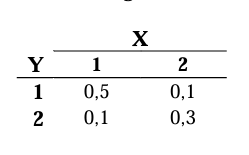

In [ ]:
import pandas as pd

# Opretter data for den bivariate fordeling
data = {'X': [1, 2, 1, 2],
        'Y': [1, 1, 2, 2],
        'P(X,Y)': [0.5, 0.1, 0.1, 0.3]}

# Opretter DataFrame
df = pd.DataFrame(data)

##a) Find den marginale sandsynlighedsfordeling af X

In [ ]:
# Beregner den marginale sandsynlighedsfordeling for X
marginale_x = df.groupby('X')['P(X,Y)'].sum().reset_index(name='P(X)')

# P(X) kolonnen indeholder vores marginale sandsynlighedsfordeling for X
marginale_x

,X,P(X)
0,1,0.6
1,2,0.4


##b) Find den marginale sandsynlighedsfordeling af Y

In [ ]:
# Beregner den marginale sandsynlighedsfordeling for Y
marginale_y = df.groupby('Y')['P(X,Y)'].sum().reset_index(name='P(Y)')

In [ ]:
# P(Y) kolonnen indeholder vores marginale sandsynlighedsfordeling for y
marginale_y

,Y,P(Y)
0,1,0.6
1,2,0.4


##c) Beregn gennemsnit og varians på X

In [ ]:
gennemsnit_x = sum(df['X'] * df['P(X,Y)'])
var_x = sum((df['X'] - gennemsnit_x)**2 * df['P(X,Y)'])

In [ ]:
gennemsnit_x, var_x

(1.4, 0.24)

##d) Beregn gennemsnit og varians på Y

In [ ]:
gennemsnit_y = sum(df['Y'] * df['P(X,Y)'])
var_y = sum((df['Y'] - gennemsnit_y)**2 * df['P(X,Y)'])

In [ ]:
gennemsnit_y, var_y

(1.4, 0.24)

#7.44
Referér til opgave 7.43. Beregn kovarians og korrelationskoefficient. (se side 182-183)

In [ ]:
# Beregning af kovariansen COV(X, Y)
cov_xy = sum((df['X'] - gennemsnit_x) * (df['Y'] - gennemsnit_y) * df['P(X,Y)'])

# Beregning af standardafvigelsen for X og Y
sd_x = var_x ** 0.5
sd_y = var_y ** 0.5

# Beregning af korrelationskoefficienten
correlation_coefficient = cov_xy / (sd_x * sd_y)

cov_xy, correlation_coefficient

(0.13999999999999999, 0.5833333333333333)

#7.45
Referér til opgave 7.43. Brug regnereglerne for middelværdi og varians for diskrete, stokastiske variable (Laws of Expected Value and Variance of the Sum of Two Variables) til at beregne gennemsnit og varians for X + Y. (se side 184)

Vi har allerede udregnet de fleste variable vi skal bruge i de tidligere opgaver; varians, gennemsnit og kovarians

In [ ]:
# Beregning af gennemsnit og varians for X + Y
gennemsnit_x_plus_y = gennemsnit_x + gennemsnit_y
v_x_plus_y = var_x + var_y + 2 * cov_xy

gennemsnit_x_plus_y, v_x_plus_y

(2.8, 0.76)

#7.97
Givet en binomialfordeling med n = 10 og p = 0,3, brug formlen (side 197) til at finde de følgende sandsynligheder:

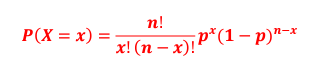

In [ ]:
from math import factorial

# Parametre for binomialfordelingen
n = 10  # Antal forsøg
p = 0.3  # Sandsynlighed for succes

Istedet for at opskrive den samme ligning 3 gange, og skifte variable, kan vi opstille en funktion der udregner den for os ved blot at give den de variable vi er interesserede i at udregne med. <br>
Der eksistere Python moduler der kan udregne det allerede, men for at forstå matematikken bag samt at få øvet lidt Python, er det en god øvelse at opskrive logikken.

In [ ]:
# Funktion til beregning af binomial sandsynlighed
def binomial_probability(n, x, p):
    return factorial(n) / (factorial(x) * factorial(n - x)) * p**x * (1 - p)**(n - x)

In [ ]:
# Beregning af sandsynligheder
# Først for a)
p_x_3 = binomial_probability(n, 3, p)
# Så for b)
p_x_5 = binomial_probability(n, 5, p)
# Til sidst for c)
p_x_8 = binomial_probability(n, 8, p)

In [ ]:
p_x_3, p_x_5, p_x_8

(0.2668279319999998, 0.10291934519999994, 0.0014467004999999993)

#7.106
Det førende mærke inden for opvaskemiddel har en markedsandel på 30 %. Der blev taget en stikprøve på 25 opvaskemiddelskunder.

In [ ]:
from scipy.stats import binom

# Parametre for binomialfordelingen
n = 25  # Antal forsøg
p = 0.3  # Sandsynlighed for succes

In [ ]:
# a. Beregning af P(X <= 10)
p_x_leq_10 = binom.cdf(10, n, p)

In [ ]:
# b. Beregning af P(X >= 11) som 1 - P(X <= 10)
p_x_geq_11 = 1 - p_x_leq_10

In [ ]:
# c. Beregning af P(X = 10) som P(X <= 10) - P(X <= 9)
p_x_eq_10 = binom.cdf(10, n, p) - binom.cdf(9, n, p)

In [ ]:
p_x_leq_10, p_x_geq_11, p_x_eq_10

(0.9021999888782681, 0.09780001112173187, 0.0916360123832135)

#7.120
Givet en stokastisk variabel, der er poissonfordelt med et gennemsnit på 2, brug formlen (side 205) til at finde følgende sandsynligheder.

In [ ]:
from scipy.stats import poisson

# Gennemsnit for Poisson-fordelingen
lambda_val = 2.0

In [ ]:
# a. Beregning af P(X = 0)
p_x_eq_0 = poisson.pmf(0, lambda_val)

In [ ]:
# b. Beregning af P(X = 3)
p_x_leq_3 = poisson.cdf(3, lambda_val)
p_x_leq_2 = poisson.cdf(2, lambda_val)
p_x_eq_3 = p_x_leq_3 - p_x_leq_2

In [ ]:
# c. Beregning af P(X = 5)
p_x_leq_5 = poisson.cdf(5, lambda_val)
p_x_leq_4 = poisson.cdf(4, lambda_val)
p_x_eq_5 = p_x_leq_5 - p_x_leq_4

In [ ]:
p_x_eq_0, p_x_eq_3, p_x_eq_5

(0.1353352832366127, 0.18044704431548364, 0.03608940886309664)

#7.122
Antallet af ulykker, der sker i et travlt lyskryds, er Poissonfordelt med et gennemsnit på 3,5 om ugen. Find sandsynligheden for de følgende begivenheder.

In [ ]:
# Gennemsnit for ugen
lambda_week = 3.5

# Gennemsnit per dag
lambda_day = 3.5 / 7

# a. Ingen begivenheder i løbet af 1 uge
p_x_eq_0_week = poisson.pmf(0, lambda_week)

# b. Fem eller flere ulykker i løbet af 1 uge
p_x_ge_5_week = 1 - poisson.cdf(4, lambda_week)

# c. Én ulykke i dag
p_x_eq_1_day = poisson.pmf(1, lambda_day)

p_x_eq_0_week, p_x_ge_5_week, p_x_eq_1_day

(0.0301973834223185, 0.27455504669039565, 0.3032653298563167)

In [ ]:
# a. Ingen begivenheder i løbet af 1 uge
p_x_eq_0_week = poisson.pmf(0, lambda_week)

In [ ]:
# b. Fem eller flere ulykker i løbet af 1 uge
p_x_ge_5_week = 1 - poisson.cdf(4, lambda_week)

In [ ]:
# c. Én ulykke i dag
p_x_eq_1_day = poisson.pmf(1, lambda_day)

In [ ]:
p_x_eq_0_week, p_x_ge_5_week, p_x_eq_1_day

(0.0301973834223185, 0.27455504669039565, 0.3032653298563167)